In [646]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [647]:
df=pd.read_csv('train[1].csv')

In [648]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [649]:
df.shape

(1460, 81)

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [651]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

<AxesSubplot:>

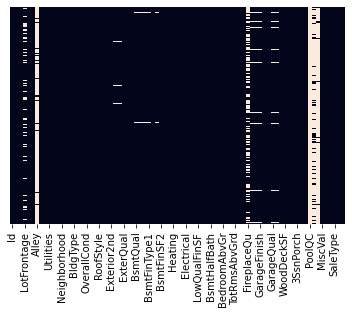

In [652]:
#cbar is for colorbar whioch appears on side and, yticklabels is for y-axis labels

sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

# filling na and dropping cols


In [653]:
#fillinf na values

df['LotFrontage'].skew()

2.163569142324884

In [654]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1, inplace=True)

In [655]:
#function for filling all object null values
def fillingna(df2):
    list1=df2[df2[0]=='object'].index
    print(list1)
    for a in list1:
        print(df[a].isnull().sum())
        df[a].fillna(df[a].mode()[0], inplace=True)
        print(df[a].isnull().sum())
        

In [656]:
fillingna(pd.DataFrame(df.dtypes))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
0
0
0
0
0
0
0
37
0
37
0
38
0
37
0
38
0
0
0
0
0
0
0
1
0
0
0
0
0
690
0
81
0
81
0
81
0
81
0
0
0
0
0
0
0


In [657]:
#LotFrontage is skewed so we will replace na values by median

df['LotFrontage'].fillna(df.LotFrontage.median(), inplace=True)

In [658]:
df['LotFrontage'].isnull().sum()

0

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

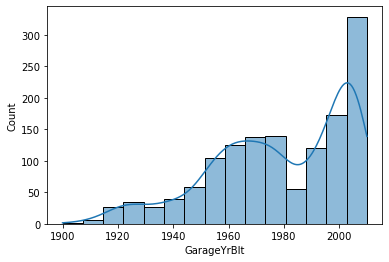

In [659]:
sns.histplot(df['GarageYrBlt'], kde=True)

In [660]:
df['GarageYrBlt'].fillna(df.GarageYrBlt.median(), inplace=True)

In [661]:
df.isnull().sum().sort_values(ascending=False)[:15]

MasVnrArea      8
Id              0
HalfBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
GarageType      0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
dtype: int64

In [662]:
df['MasVnrArea'].dtype

dtype('float64')

In [663]:
df['MasVnrArea'].skew()

2.669084210182863

In [664]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [665]:
df.isnull().sum().sort_values(ascending=False)[:15]

Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
HeatingQC       0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
dtype: int64

<AxesSubplot:>

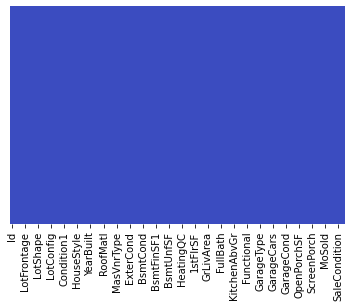

In [666]:
sns.heatmap(df.isnull(), cbar=False,yticklabels=False, cmap='coolwarm')

# get dummies function or OHT

In [667]:
df1=pd.DataFrame(df.dtypes)

In [668]:
list1=list(df1[df1[0]=='object'].index)
type(list1)

list

In [669]:
def getdummies(multcols):
    final_df=df
    df_final=final_df
    i=0
    for a in multcols:
        
        df2=pd.get_dummies(final_df[a], drop_first=True)
        
        final_df.drop(a, axis=1, inplace=True)
        
        if i==0:
            df_final=df2.copy()
             
        else:
            df_final=pd.concat([df_final,df2], axis=1)
        i=i+1   
        
    df_final=pd.concat([final_df,df_final], axis=1)
    return df_final

In [670]:
main_df=df

In [671]:
df_new=getdummies(list1)